In [2]:
# Import necessary packages
import os 

import numpy as np
import pandas as pd
import xarray as xr 
import rioxarray as rxr
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3, style='white')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

c:\Users\Francesco\anaconda3\envs\env\Lib\site-packages\earthpy\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [3]:
# Open the data
data_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_tasmax_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_monthly.nc"
max_temp_xr = xr.open_dataset(data_path)
max_temp_xr

# View the crs
climate_crs = max_temp_xr.rio.crs
climate_crs

# View the max and min lat and lon
print('Min and Max Lat:', max_temp_xr['air_temperature']['lat'].values.min(), max_temp_xr['air_temperature']['lat'].values.max())
print('Min and Max Lon:', max_temp_xr['air_temperature']['lon'].values.min(), max_temp_xr['air_temperature']['lon'].values.max())

# View the first and last date
print('The first date is:', max_temp_xr['air_temperature']['time'].values.min())
print('The last date is:', max_temp_xr['air_temperature']['time'].values.max())

# View the metadata and the title
metadata = max_temp_xr.attrs
metadata
metadata['title']

Min and Max Lat: 25.063077926635742 49.39602279663086
Min and Max Lon: 235.22784423828125 292.93524169921875
The first date is: 1950-01-15 00:00:00
The last date is: 2005-12-15 00:00:00


'Monthly aggregation of downscaled daily meteorological data of Monthly Average of Daily Maximum Near-Surface Air Temperature from College of Global Change and Earth System Science, Beijing Normal University (BNU-ESM) using the run r1i1p1 of the historical scenario.'

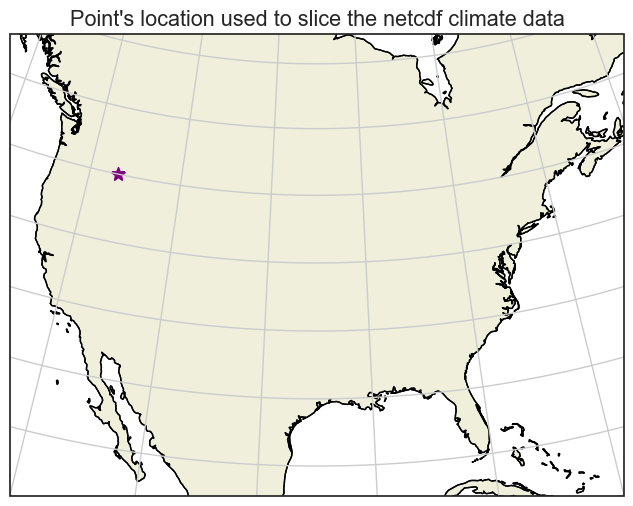

array([273.74884, 277.1434 , 280.0702 , 280.6042 , 289.23993, 290.86853,
       297.70242, 301.36722, 296.4382 , 291.29434, 275.8434 , 273.0037 ,
       275.154  , 278.77863, 282.29105, 283.87787, 290.53387, 296.701  ,
       297.4607 , 301.16116, 295.5421 , 287.3863 , 276.85397, 274.35953,
       278.0117 , 275.68024, 282.12674, 286.41693, 292.4094 , 297.30606,
       300.84628, 302.10593, 288.83698, 288.44   , 276.38992, 276.5348 ,
       275.86145, 276.5708 , 280.8476 , 284.35712, 292.14087, 293.66147,
       301.09534, 302.7656 , 294.99573, 287.5425 , 277.80093, 273.25894,
       274.09232, 276.94736, 280.25446, 283.47614, 289.63776, 290.5187 ,
       301.8519 , 300.40402, 290.73633, 289.60886, 277.12424, 275.7836 ],
      dtype=float32)

In [5]:
# Data subset per location and time

latitude = 45.02109146118164
longitude = 243.01937866210938

# Plot this point in the CONUS map
extent = [-120, -70, 20, 55.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
map_proj = ccrs.AlbersEqualArea(central_lon, central_lat)

f, ax = plt.subplots(figsize=(12, 6),
                     subplot_kw={'projection':map_proj})
ax.coastlines()
ax.plot(longitude-360,
        latitude,
        '*',
        transform=ccrs.PlateCarree(),
        color='purple',
        markersize=10)
ax.set_extent(extent)
ax.set_title("Point's location used to slice the netcdf climate data")
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.gridlines()
plt.show()

start_date = '2000-01-01'
end_date = '2005-01-01'

temp_2000_2005 = max_temp_xr['air_temperature'].sel(time=slice(start_date, end_date),
                                                    lat=latitude,
                                                    lon=longitude)
temp_2000_2005
temp_2000_2005.shape
temp_2000_2005.values

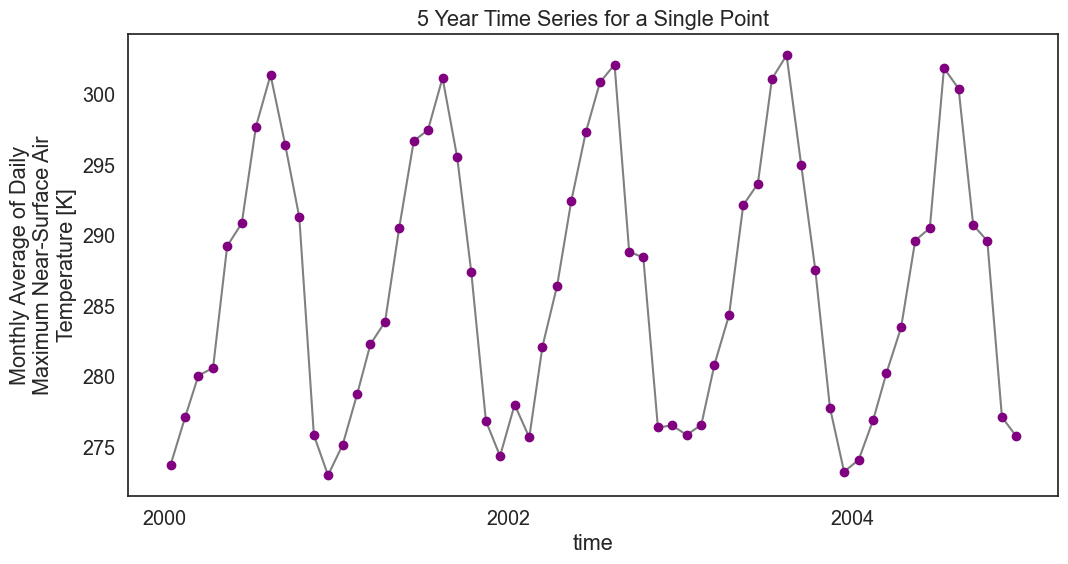

In [6]:
# Plot the time series
f, ax = plt.subplots(figsize=(12, 6))
temp_2000_2005.plot.line(hue='lat',
                    marker='o',
                    ax=ax,
                    color='grey',
                    markerfacecolor='purple',
                    markeredgecolor='purple')
ax.set_title('5 Year Time Series for a Single Point')
plt.show()

In [7]:
# Transform the data in a dataframe and export it as a csv file
temp_2000_2005_df = temp_2000_2005.to_dataframe()
temp_2000_2005_df.head()
file_name = 'monthly_temp-'+ start_date + '-' + end_date + '.csv'
temp_2000_2005_df.to_csv(file_name)

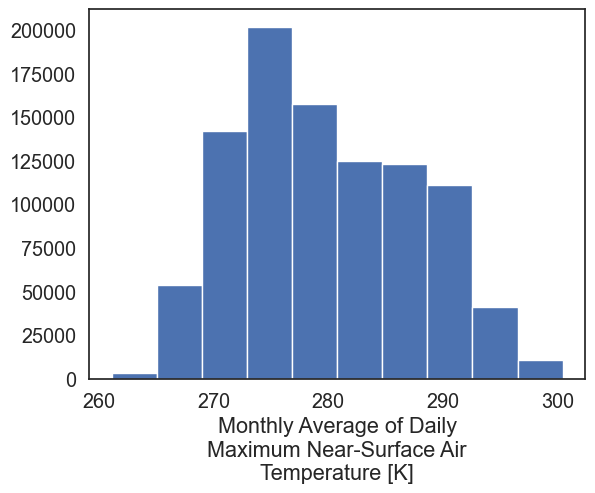

In [8]:
# Data subset per 2 moths (all locations)
start_date = '1950-01-15'
end_date = '1950-02-15'
two_months_conus = max_temp_xr['air_temperature'].sel(time=slice(start_date, end_date))
two_months_conus
two_months_conus.shape

# Plot an histogram (by default when 2 layers (months) of data)
two_months_conus.plot()
plt.show()

C:\Users\Francesco\AppData\Local\Temp\ipykernel_23116\127372572.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


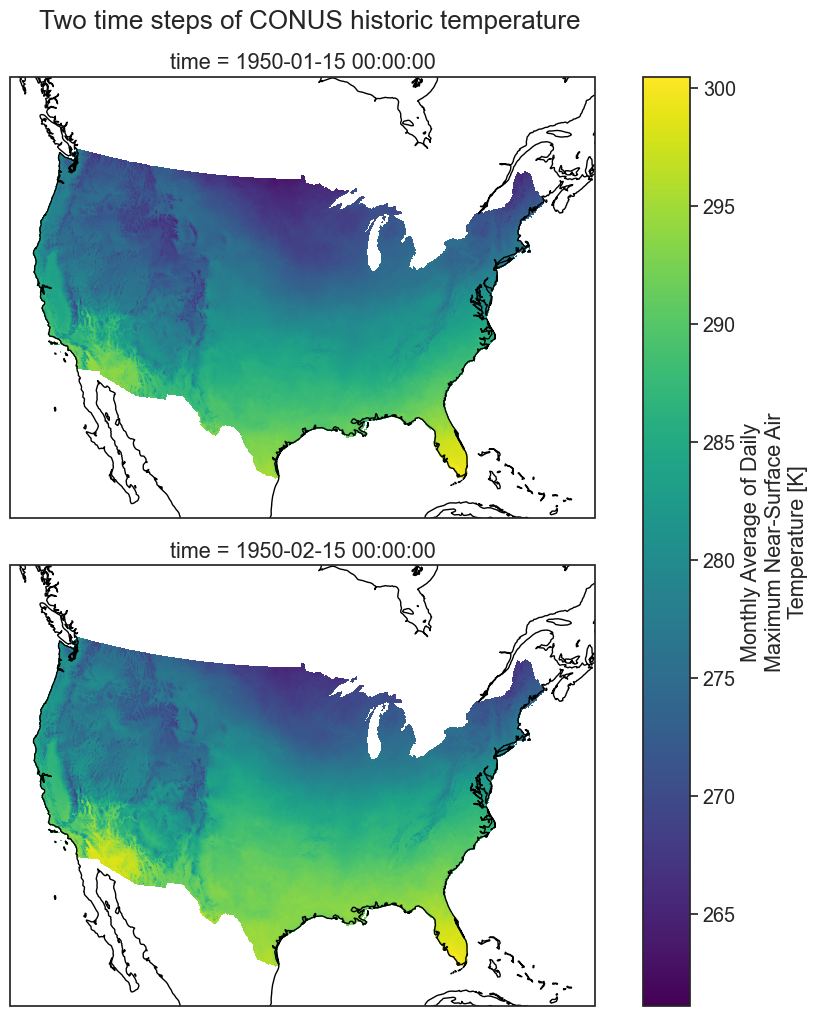

In [23]:
# Plot the data with CONUS
aspect = two_months_conus.shape[2]/two_months_conus.shape[1]
p=two_months_conus.plot(transform=ccrs.PlateCarree(),
                        col='time',
                        col_wrap=1,
                        aspect=aspect,
                        figsize=(10,10),
                        subplot_kws={'projection':map_proj})
plt.suptitle('Two time steps of CONUS historic temperature', y=1.02)
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent(extent)

In [ ]:
# Export raster to Geotiff

# Check the crs
two_months_conus.rio.crs

file_path = 'two_months_temp_data.tif'
two_months_conus.rio.to_raster(file_path)

# Open the data
two_months_tiff = rxr.open_rasterio(file_path)
two_months_tiff
# Clean the nan values
two_months_clean = two_months_tiff.where(two_months_tiff != two_months_tiff.rio.nodata)

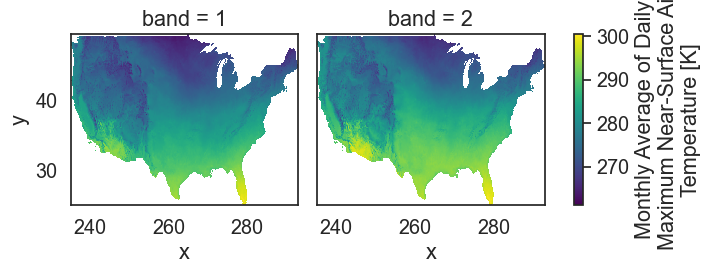

In [21]:
# Plot the data
two_months_clean.plot(col='band')
plt.show()